In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0
x_train.shape
# y_test[:10]

(60000, 28, 28)

In [ ]:
##  ANN

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
##  CNN

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 6ms/step - loss: 0.2964 - accuracy: 0.9144 - val_loss: 0.1392 - val_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1459 - accuracy: 0.9566 - val_loss: 0.1054 - val_accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1098 - accuracy: 0.9664 - val_loss: 0.0857 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0897 - accuracy: 0.9726 - val_loss: 0.0783 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0763 - accuracy: 0.9762 - val_loss: 0.0751 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0659 - accuracy: 0.9793 - val_loss: 0.0696 - val_accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0611 - accuracy: 0.9802 - val_loss: 0.0706 - val_accurac

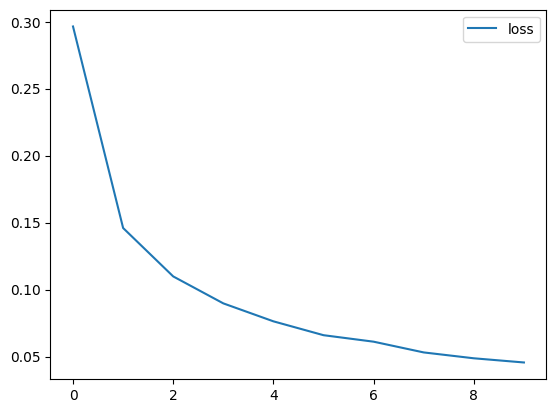

In [ ]:
plt.plot(r.history['loss'],label='loss')
# plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

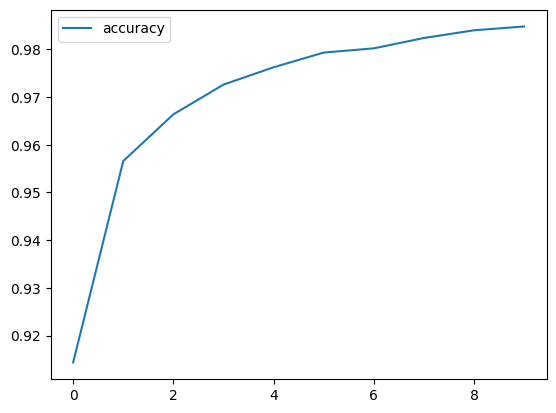

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
# plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
eval=model.evaluate(x_test,y_test)
print("Accuracy : ", eval[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9795
Accuracy :  0.9794999957084656


In [ ]:
from sklearn.metrics import confusion_matrix
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
print(cm)

313/313 [==============================] - 1s 1ms/step


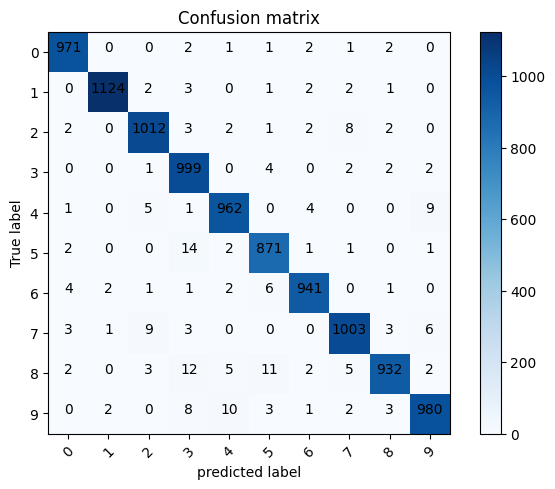

In [ ]:
# def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
#   if normalize:
#     cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  

#   plt.imshow(cm,interpolation='nearest',cmap=cmap)
#   plt.title(title)
#   plt.colorbar()
#   tick_marks=np.arange(len(classes))
#   plt.xticks(tick_marks,classes,rotation=45)
#   plt.yticks(tick_marks,classes)

#   fmt='.2f' if normalize else 'd'
#   thresh=cm.max()/.2
#   for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
#     plt.text(j,i,format(cm[i,j],fmt),
#              ha="center",
#              color='white' if cm[i,j]> thresh else 'black')

#   plt.tight_layout()
#   plt.ylabel('True label')
#   plt.xlabel('predicted label')
#   plt.show

# p_test=model.predict(x_test).argmax(axis=1)
# cm=confusion_matrix(y_test,p_test)
# # print(cm)
# plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True label: 4 Predicted: 6 ')

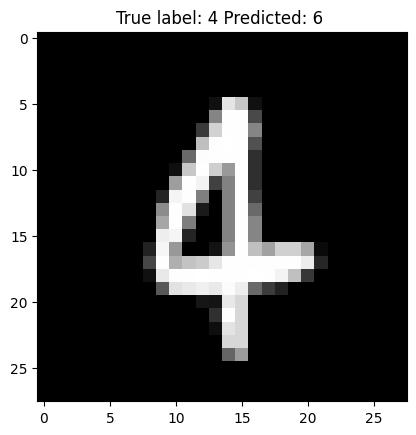

In [ ]:
misclassified_idx=np.where(p_test!=y_test)[0]
# misclassified_idx[:10]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %s Predicted: %s '%(y_test[i],p_test[i]))